<a href="https://colab.research.google.com/github/jmestralet/Proyecto_DS_Coderhouse/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al proyecto y objetivo

En el presente proyecto, se utiliza un dataset que representa la cartera de clientes de una empresa.

**Uno de los desafíos que presentan las cartera de clientes, es evitar que estas decrezcan, por lo que toma importancia detectar de forma preventiva un posible abandono de clientes** (fuga).

Partiendo de lo anterior, surge la pregunta **¿Es posible predecir la fuga de clientes?**
--

**Durante este trabajo, se buscará encontrar caracteristicas y/o patrones que permitan identificar clientes con alta propabilidad de fugarse.**

En este sentido, buscaré validar las siguientes **Hipotesis:**
--
* **Hipotesis Nula**:
Los datos y variables existentes, no son suficientes para identificar a grupos de clientes con más de un 60% de probabilidad de fuga.

* **Hipotesis Alternativa**:
Los datos y variables existentes, son suficientes para identificar a grupos de clientes con más de un 60% de probabilidad de fuga.


## Listado de **columnas del dataset** a utilizar

* ID de cliente:	Identificador único para cada cliente.
* Edad:	edad del cliente
* Género:	El género del cliente (Hombre, Mujer, Otro).
* Tipo de cuenta:	Tipo de cuenta (Corriente, Ahorro, Inversión).
* Saldo de la cuenta:	El saldo en la cuenta del cliente
* Fecha de transacción:	Fecha de la última transacción realizada por el cliente.
* Monto de la transacción:	Importe de la última transacción, indicando el compromiso del cliente.
* Tipo de transacción:	Tipo de la última transacción (Depósito, Retiro, etc.).
* Rama:	Ubicación de la sucursal donde se encuentra la cuenta.
* Monto del préstamo:	Importe de cualquier préstamo obtenido por el cliente.
* Puntuación crediticia:	La puntuación crediticia del cliente, que indica su salud financiera.
* Está_empleado:	Si el cliente está empleado (Verdadero/Falso).
* Ingresos anuales:	El ingreso anual total del cliente.
* Estado civil:	El estado civil del cliente (soltero, casado, etc.).
* Sucursal:	La región geográfica del cliente.
* Fecha de apertura de la cuenta:	La fecha en que se abrió la cuenta del cliente.
* Fecha de la última transacción:	Fecha de la más reciente transacción realizada por el cliente.
* Número_de_transacciones:	Número total de transacciones en el último año.
* Tendencia de actividad de la cuenta:	Si la actividad de la cuenta está aumentando, disminuyendo o es estable.
* Interacciones de servicio al cliente:	Número de interacciones con el servicio de atención al cliente que posiblemente indiquen insatisfacción.
* Quejas recientes:	Número de quejas realizadas por el cliente, que potencialmente indican insatisfacción.
* Cambio en el saldo de la cuenta:	Cambio en el saldo de la cuenta a lo largo del tiempo, lo que indica estabilidad o dificultad financiera.
* Puntuación de satisfacción del cliente:	Calificación de satisfacción del cliente (1-5)
* Etiqueta de abandono:	Indica si el cliente ha abandonado el servicio (1) o no (0).
* Periodo de tiempo de abandono (meses)

**Fuente del dataset:** https://www.kaggle.com/datasets/simronw/churn-prediction-unlocking-retention-secrets



#Importación de librerías
Se importan todas las librerías que serán utilizadas en el proyecto

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

#algunas configuraciones
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Carga del dataset y transformaciones iniciales
**El dataset se encuentra en formato csv**, por lo que se carga de la siguiente forma.

In [407]:
df = pd.read_csv('Abandono_de_clientes.csv', sep=';')

Antes de comenzar a explorar los datos, se traducen los nombres de las columnas a Español:

In [408]:
print('Columnas:')
df.columns


Columnas:


Index(['Customer_ID', 'Age', 'Gender', 'Account_Type', 'Account_Balance',
       'Transaction_Date', 'Transaction_Amount', 'Transaction_Type', 'Branch',
       'Loan_Amount', 'Loan_Type', 'Credit_Score', 'Is_Employed',
       'Annual_Income', 'Marital_Status', 'Region', 'Account_Open_Date',
       'Last_Transaction_Date', 'Number_of_Transactions',
       'Account_Activity_Trend', 'Customer_Service_Interactions',
       'Recent_Complaints', 'Change_in_Account_Balance',
       'Customer_Satisfaction_Score', 'Churn_Label', 'Churn_Timeframe'],
      dtype='object')

In [409]:
df=df.rename(columns={'Customer_ID':'Cliente_ID',
                      'Age':'Edad',
                      'Gender':'Genero',
                      'Account_Type':'Tipo de cuenta',
                      'Account_Balance':'Saldo de cuenta',
                      'Transaction_Date':'Fecha de transaccion',
                      'Transaction_Amount':'Monto de transaccion',
                      'Transaction_Type':'Tipo de transaccion',
                      'Branch':'Sucursal',
                      'Loan_Amount':'Monto de prestamo',
                      'Loan_Type':'Tipo de prestamo',
                      'Credit_Score':'Score crediticio',
                      'Is_Employed':'Es empleado',
                      'Annual_Income':'Ingreso anual',
                      'Marital_Status':'Estado Civil',
                      'Account_Open_Date':'Fecha de apertura de cuenta',
                      'Last_Transaction_Date':'Fecha de ultima transaccion',
                      'Number_of_Transactions':'Numero de transacciones',
                      'Account_Activity_Trend':'Tendencia de actividad en cuenta',
                      'Customer_Service_Interactions':'Interacciones de servicio al cliente',
                      'Recent_Complaints':'Quejas recientes',
                      'Change_in_Account_Balance':'Cambio en saldo de cuenta',
                      'Customer_Satisfaction_Score':'Puntuación de satisfacción del cliente',
                      'Churn_Label':'Etiqueta de abandono',
                      'Churn_Timeframe':'Periodo de tiempo de abandono (meses)'})
print('Columnas renombradas:')
df.columns

Columnas renombradas:


Index(['Cliente_ID', 'Edad', 'Genero', 'Tipo de cuenta', 'Saldo de cuenta',
       'Fecha de transaccion', 'Monto de transaccion', 'Tipo de transaccion',
       'Sucursal', 'Monto de prestamo', 'Tipo de prestamo', 'Score crediticio',
       'Es empleado', 'Ingreso anual', 'Estado Civil', 'Region',
       'Fecha de apertura de cuenta', 'Fecha de ultima transaccion',
       'Numero de transacciones', 'Tendencia de actividad en cuenta',
       'Interacciones de servicio al cliente', 'Quejas recientes',
       'Cambio en saldo de cuenta', 'Puntuación de satisfacción del cliente',
       'Etiqueta de abandono', 'Periodo de tiempo de abandono (meses)'],
      dtype='object')

Se visualizan algunos registros y columnas para observar la **estructura del dataframe**

In [410]:
print('Primeros 4 registros:')
df.head(4)

Primeros 4 registros:


,Cliente_ID,Edad,Genero,Tipo de cuenta,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Tipo de transaccion,Sucursal,Monto de prestamo,...,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Tendencia de actividad en cuenta,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses)
0,8f0b813f-971a-45c8-8347-48a0d5cd3f2e,50,Female,Savings,26046.21,14/2/2025,4819.48,Payment,Freemanview,1063.29,...,26/8/2022,24/3/2025,8,Increasing,1,2,-1024.51,1,1,1
1,ec299825-6aa6-47f3-bfc0-0b65d3d4b1e3,69,Female,Checking,27415.23,26/2/2025,3072.79,Deposit,Floresmouth,35493.90,...,18/6/2024,2/3/2025,4,Stable,1,0,-2900.10,3,0,0
2,3f992fba-cd14-417e-b5d9-55173b985bef,38,Female,Checking,86709.64,26/3/2025,1423.93,Deposit,West Francis,0.00,...,17/8/2020,13/3/2025,2,Increasing,4,0,-2600.01,1,0,0
3,be551680-156f-4f47-b283-192bbcb80571,57,Male,Savings,56826.79,25/2/2025,3929.43,Deposit,Diazport,41939.84,...,15/9/2023,26/3/2025,18,Stable,0,2,154.73,1,1,11


In [411]:
filas, columnas = df.shape
print(f'El df esta compuesto por {filas} filas y {columnas} columnas')

El df esta compuesto por 5000 filas y 26 columnas


**Tipo de datos del dataframe**

In [412]:
print('Columnas del dataframe')
df.info()

Columnas del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cliente_ID                              5000 non-null   object 
 1   Edad                                    5000 non-null   int64  
 2   Genero                                  5000 non-null   object 
 3   Tipo de cuenta                          5000 non-null   object 
 4   Saldo de cuenta                         5000 non-null   float64
 5   Fecha de transaccion                    5000 non-null   object 
 6   Monto de transaccion                    5000 non-null   float64
 7   Tipo de transaccion                     5000 non-null   object 
 8   Sucursal                                5000 non-null   object 
 9   Monto de prestamo                       5000 non-null   float64
 10  Tipo de prestamo                     

**Chequeo de valores nulos**

Se observan valores nulos en la columna 'Tipo de Prestamo'. Se procede a chequear los nulos por columna, a fin de realizar un segundo chequeo.

In [413]:
# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)


Porcentaje de valores nulos por columna:
Cliente_ID                                 0.0
Edad                                       0.0
Genero                                     0.0
Tipo de cuenta                             0.0
Saldo de cuenta                            0.0
Fecha de transaccion                       0.0
Monto de transaccion                       0.0
Tipo de transaccion                        0.0
Sucursal                                   0.0
Monto de prestamo                          0.0
Tipo de prestamo                          76.0
Score crediticio                           0.0
Es empleado                                0.0
Ingreso anual                              0.0
Estado Civil                               0.0
Region                                     0.0
Fecha de apertura de cuenta                0.0
Fecha de ultima transaccion                0.0
Numero de transacciones                    0.0
Tendencia de actividad en cuenta           0.0
Interacciones de s

Se define un umbral del 30%, para los nulos por columna, y se eliminan aquellas
que no superen el mismo

In [414]:
# Definicion de umbral
umbral = 0.3 * len(df)
# Identificacion de columnas a eliminar
columnas_a_eliminar = df.columns[df.isnull().sum() > umbral]
print("Columnas a eliminar, con más del 30% de NaN:", columnas_a_eliminar.tolist())
# Eliminacion de las columnas identificadas
df.drop(columns=columnas_a_eliminar, inplace=True)

print("Tamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar columnas con >30% NaN:", df.shape)

Columnas a eliminar, con más del 30% de NaN: ['Tipo de prestamo']
Tamaño del DataFrame original: (5000, 25)
Tamaño después de eliminar columnas con >30% NaN: (5000, 25)


La columna 'Tipo de prestamo' presenta un 76% de valores nulos, lo que supera al umbral definido. Por lo anterior, se procede a eliminarla del analisis

**Formato de columnas**


Se cambia el formato de algunas columnas

In [415]:
fecha_corte='2025-03-31'
df['Fecha_corte']= pd.to_datetime(fecha_corte)
df['Fecha de transaccion'] = pd.to_datetime(df['Fecha de transaccion'])
df['Fecha de apertura de cuenta'] = pd.to_datetime(df['Fecha de apertura de cuenta'])
df['Fecha de ultima transaccion'] = pd.to_datetime(df['Fecha de ultima transaccion'])


**Creación de columnas**

Se crean variables que pueden resultar de utilidad para el análisis

In [416]:
#Antiguedad en años: indica la cantidad de años que el cliente pertenece a la empresa
df['Antiguedad en años'] = (df['Fecha_corte'] - df['Fecha de apertura de cuenta']).dt.days / 365
#Frecuencia de transacciones por año
df['Frecuencia de transacciones por año'] = df['Numero de transacciones']/df['Antiguedad en años']
#Recencia: indica el tiempo desde la última transacción
df['Recencia'] = (df['Fecha_corte'] - df['Fecha de ultima transaccion']).dt.days


**Valores en cero**

In [417]:
ceros_por_col = (df == 0).sum()
print(ceros_por_col)

Cliente_ID                                   0
Edad                                         0
Genero                                       0
Tipo de cuenta                               0
Saldo de cuenta                              0
Fecha de transaccion                         0
Monto de transaccion                         0
Tipo de transaccion                          0
Sucursal                                     0
Monto de prestamo                         3514
Score crediticio                             0
Es empleado                               2457
Ingreso anual                                0
Estado Civil                                 0
Region                                       0
Fecha de apertura de cuenta                  0
Fecha de ultima transaccion                  0
Numero de transacciones                      0
Tendencia de actividad en cuenta             0
Interacciones de servicio al cliente       825
Quejas recientes                          1656
Cambio en sal

Se detecta que la columna Monto de prestamo tiene 3.514 valores en cero, que corresponderían a clientes que no accedieron a un prestamo con la empresa. A fin de mejorar esta identificacion, se crea la columna tuvo_prestamo, para utilizar durante el análisis.

Los valores del resto de las columnas se ven coherentes

In [418]:
#Se crea la columna 'Tuvo prestamo', la cual indica si el cliente en algún momento adquirió un prestamo con la empresa
def tuvo_prestamo(row):
    if row['Monto de prestamo'] > 0:
        return 'Si'
    else:
        return 'No'
# Aplicar la función a cada fila
df['Tuvo prestamo'] = df.apply(tuvo_prestamo, axis=1)

# Exploración de datos

**Proporcion de clientes segun su estado en la cartera**

Se utiliza la variable 'Etiqueta de abandono', la cual indica:

* 0 = Cliente Activo

* 1 = Cliente fugado



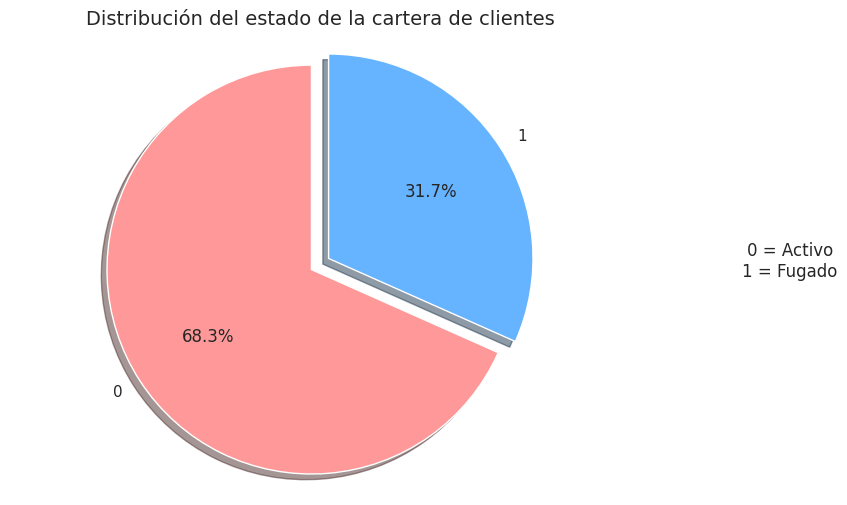

In [419]:
conteo = df['Etiqueta de abandono'].value_counts()

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(conteo, labels=conteo.index, colors=['#ff9999', '#66b3ff'],
       autopct='%1.1f%%', shadow=True, startangle=90,
       explode=(0.1, 0))

ax.axis('equal')

plt.title('Distribución del estado de la cartera de clientes', fontsize=14)
plt.text(1.1, 0.5, '0 = Activo\n1 = Fugado', ha='center', va='center', fontsize=12,
         transform=fig.transFigure)
plt.show()

*El 31% de la cartera de clientes se encuentra "fugado".*

**Se exploran otras variables**

Clientes bajo relacion de dependencia

In [420]:
"Clientes bajo relacion de dependencia"
conteo = df.groupby('Es empleado')['Cliente_ID'].agg('count').reset_index()
total_clientes = df['Cliente_ID'].nunique()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100


print('Proporción de clientes bajo relacion de dependencia:')
print(conteo)

Proporción de clientes bajo relacion de dependencia:
   Es empleado  Cliente_ID  Porcentaje
0        False        2457       49.14
1         True        2543       50.86


Clientes por género

In [421]:
conteo = df.groupby('Genero')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Genero:')
print(conteo)


Proporción de clientes según Genero:
   Genero  Cliente_ID  Porcentaje
0  Female        1658       33.16
1    Male        1686       33.72
2   Other        1656       33.12


Clientes por estado civil

In [422]:
conteo = df.groupby('Estado Civil')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Estado Civil:')
print(conteo)


Proporción de clientes según Estado Civil:
  Estado Civil  Cliente_ID  Porcentaje
0     Divorced        1237       24.74
1      Married        1220       24.40
2       Single        1257       25.14
3      Widowed        1286       25.72


Clientes por región

In [423]:
conteo = df.groupby('Region')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100
print('Proporción de clientes según Region:')
print(conteo)


Proporción de clientes según Region:
  Region  Cliente_ID  Porcentaje
0   East        1255       25.10
1  North        1242       24.84
2  South        1238       24.76
3   West        1265       25.30


Actividad de la cuenta

In [424]:

conteo = df.groupby('Tendencia de actividad en cuenta')['Cliente_ID'].agg('count').reset_index()
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

print('Proporción de clientes según Tendencia de actividad en cuenta:')
print(conteo)


Proporción de clientes según Tendencia de actividad en cuenta:
  Tendencia de actividad en cuenta  Cliente_ID  Porcentaje
0                       Decreasing        1591       31.82
1                       Increasing        1729       34.58
2                           Stable        1680       33.60


**Estadisticos descriptivos**

In [425]:
print('Estadisticos descriptivos:')
df.describe()

Estadisticos descriptivos:


,Edad,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Monto de prestamo,Score crediticio,Ingreso anual,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses),Fecha_corte,Antiguedad en años,Frecuencia de transacciones por año,Recencia
count,5000.000000,5000.000000,5000,5000.000000,5000.00000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,43.930000,50378.659748,2025-02-14 08:03:15.839999744,2519.289100,7661.64505,574.537800,110500.612678,2022-08-15 14:34:39.360000,2025-02-13 12:18:08.639999744,10.468200,2.530000,1.016000,46.275696,3.036600,0.316600,2.124400,2025-03-31 00:00:00,2.625733,17.305446,45.487400
min,18.000000,509.950000,2025-01-01 00:00:00,10.480000,0.00000,300.000000,20019.560000,2020-01-01 00:00:00,2025-01-01 00:00:00,1.000000,0.000000,0.000000,-4999.230000,1.000000,0.000000,0.000000,2025-03-31 00:00:00,0.002740,0.190900,1.000000
25%,31.000000,26085.310000,2025-01-23 00:00:00,1258.035000,0.00000,438.000000,66260.917500,2021-04-23 18:00:00,2025-01-23 00:00:00,5.000000,1.000000,0.000000,-2474.207500,2.000000,0.000000,0.000000,2025-03-31 00:00:00,1.315068,2.073275,23.000000
50%,44.000000,50587.400000,2025-02-14 00:00:00,2548.545000,0.00000,573.000000,110586.580000,2022-08-28 00:00:00,2025-02-13 00:00:00,11.000000,3.000000,1.000000,36.780000,3.000000,0.000000,0.000000,2025-03-31 00:00:00,2.591781,4.028205,46.000000
75%,57.000000,75093.985000,2025-03-09 00:00:00,3733.492500,9045.88000,708.000000,155956.980000,2023-12-07 00:00:00,2025-03-08 00:00:00,15.000000,4.000000,2.000000,2566.350000,4.000000,1.000000,3.000000,2025-03-31 00:00:00,3.937671,7.978142,67.000000
max,70.000000,99994.250000,2025-03-30 00:00:00,4999.930000,49953.14000,850.000000,199911.090000,2025-03-30 00:00:00,2025-03-30 00:00:00,20.000000,5.000000,2.000000,4999.570000,5.000000,1.000000,12.000000,2025-03-31 00:00:00,5.249315,6935.000000,89.000000
std,15.187285,28436.192789,NaN,1436.423023,14021.98745,158.134083,52015.230170,NaN,NaN,5.733059,1.719561,0.823577,2899.725824,1.426628,0.465196,3.657814,NaN,1.511140,144.312680,25.573569


In [426]:
for column in df.describe().columns:
    media = df.describe().loc['mean', column]
    print(f'La columna {column} presenta una media de {media}')

La columna Edad presenta una media de 43.93
La columna Saldo de cuenta presenta una media de 50378.659748000005
La columna Fecha de transaccion presenta una media de 2025-02-14 08:03:15.839999744
La columna Monto de transaccion presenta una media de 2519.2891
La columna Monto de prestamo presenta una media de 7661.64505
La columna Score crediticio presenta una media de 574.5378
La columna Ingreso anual presenta una media de 110500.61267799999
La columna Fecha de apertura de cuenta presenta una media de 2022-08-15 14:34:39.360000
La columna Fecha de ultima transaccion presenta una media de 2025-02-13 12:18:08.639999744
La columna Numero de transacciones presenta una media de 10.4682
La columna Interacciones de servicio al cliente presenta una media de 2.53
La columna Quejas recientes presenta una media de 1.016
La columna Cambio en saldo de cuenta presenta una media de 46.27569600000001
La columna Puntuación de satisfacción del cliente presenta una media de 3.0366
La columna Etiqueta de

**Analisis de la tasa de fuga de clientes por variable categórica**

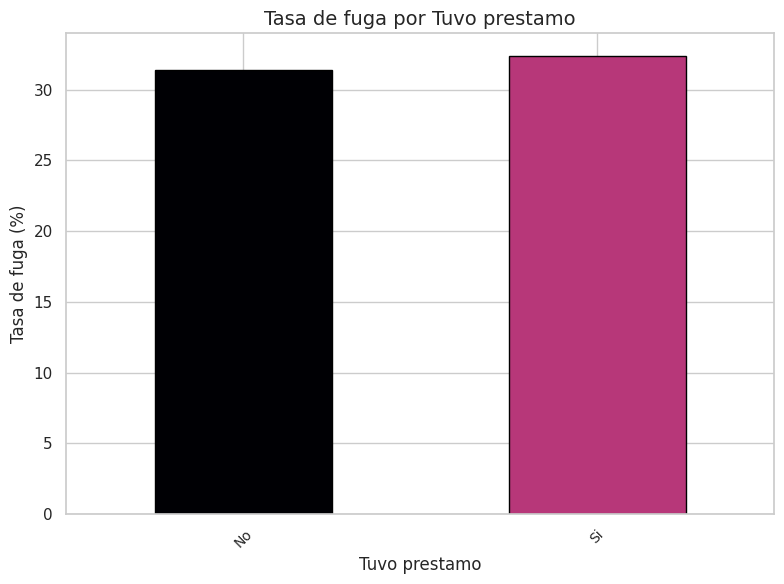

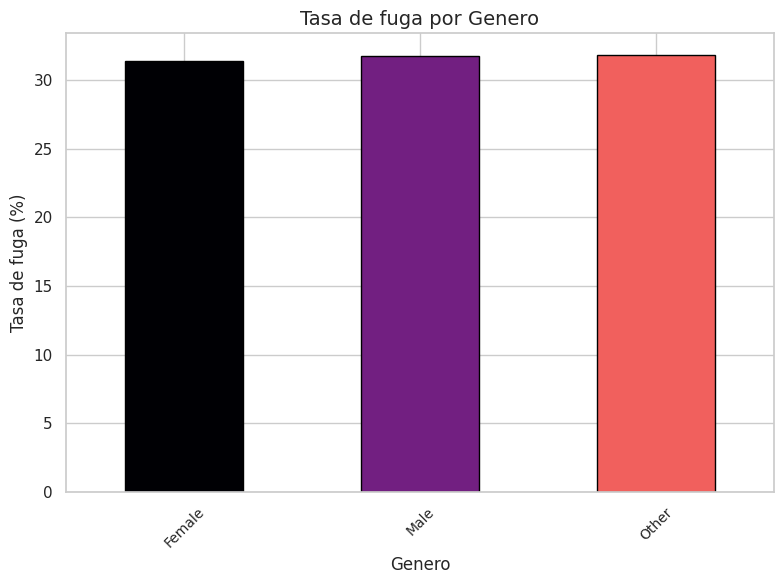

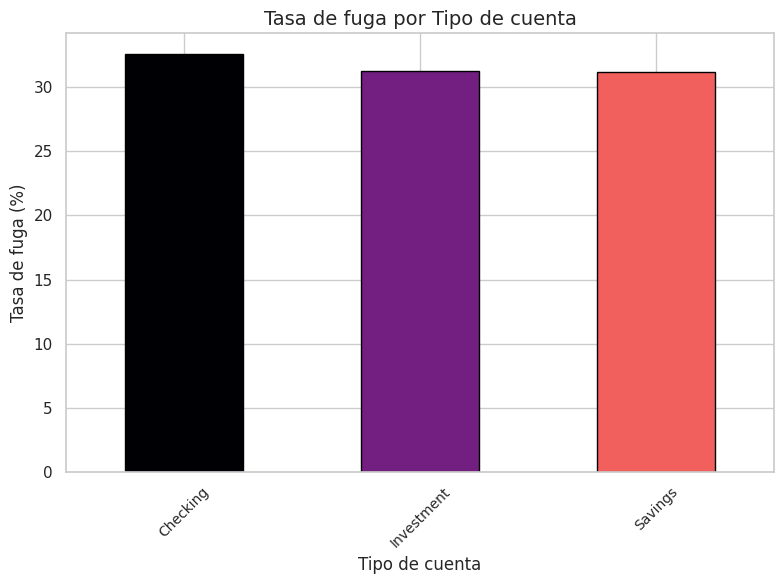

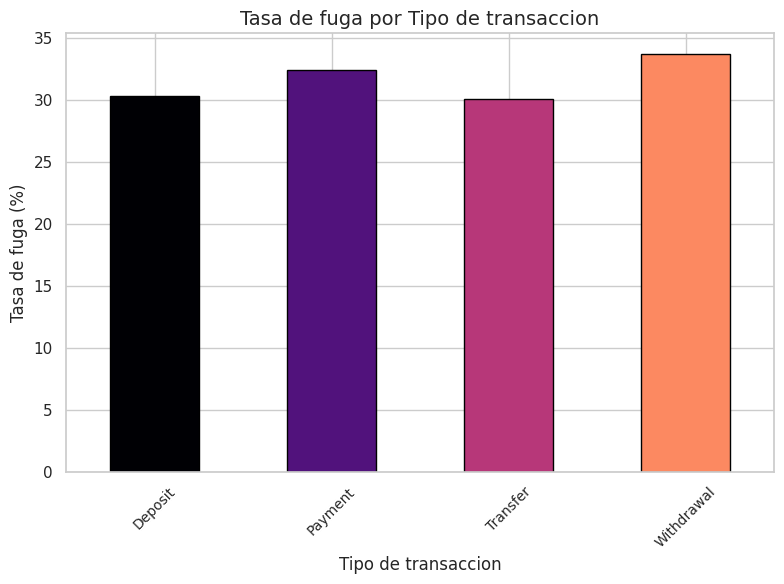

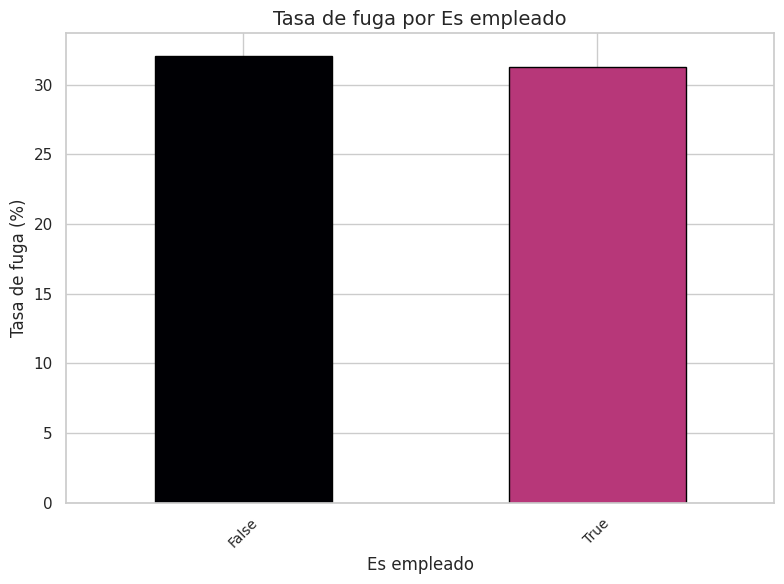

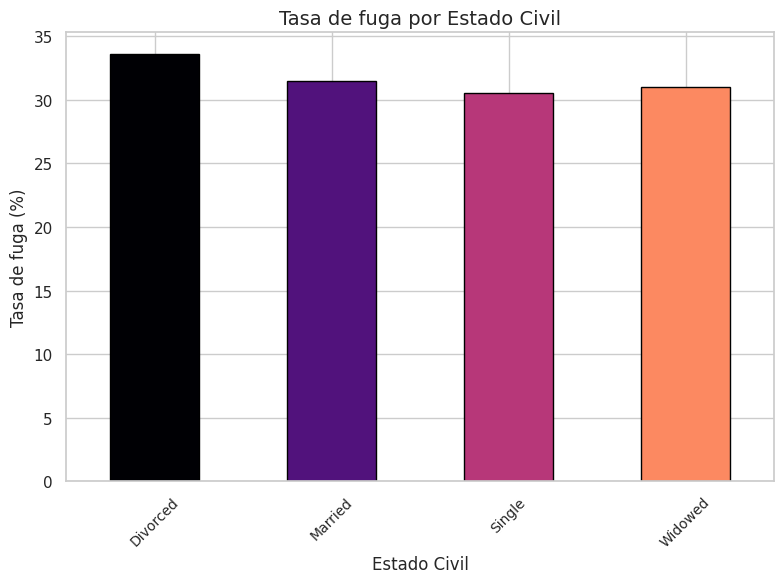

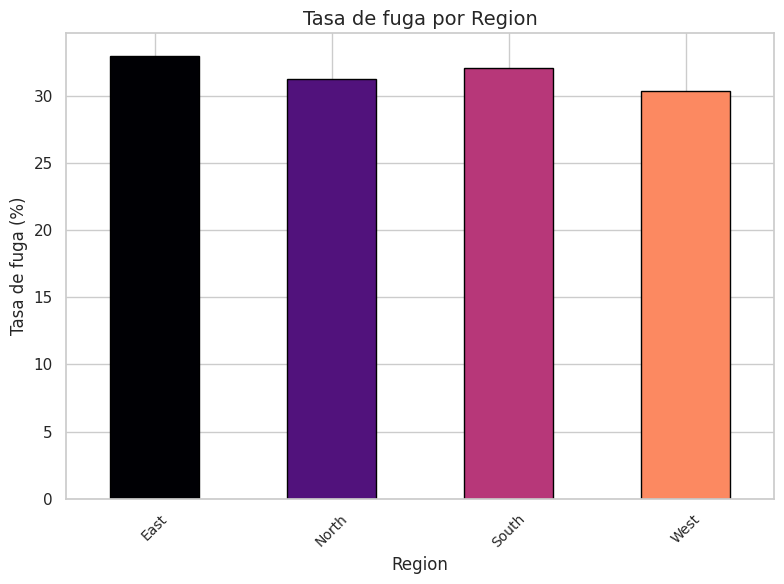

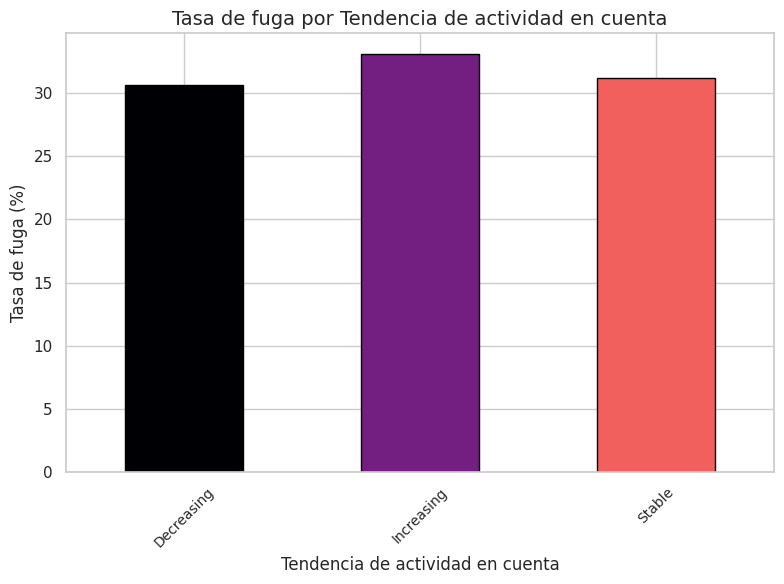

In [427]:


categoricas = [
    'Tuvo prestamo', 'Genero', 'Tipo de cuenta', 'Tipo de transaccion',
    'Es empleado', 'Estado Civil', 'Region', 'Tendencia de actividad en cuenta'
]


colormap = plt.get_cmap('magma')

for col in categoricas:

    tasa = df.groupby(col)['Etiqueta de abandono'].mean() * 100


    num_categories = len(tasa)
    colors = [colormap(i / num_categories) for i in range(num_categories)]


    fig, ax = plt.subplots(figsize=(8, 6))
    bars = tasa.plot(kind='bar', ax=ax, edgecolor='black', color=colors)
    ax.set_title(f'Tasa de fuga por {col}', fontsize=14)
    ax.set_ylabel('Tasa de fuga (%)', fontsize=12)
    ax.set_xlabel(col, fontsize=12)


    ax.tick_params(axis='x', rotation=45, labelsize=10)

    plt.tight_layout()


    plt.show()


Al observarse las variables categoricas, no se destacan valores que puedan inferir una mayor probabilidad de fuga.
--

**Analisis de variables numericas**

In [428]:
import matplotlib.pyplot as plt

def graficar_histograma_separado_por_fuga(df, columna):
    no_fugados = df[df['Etiqueta de abandono'] == 0]
    fugados = df[df['Etiqueta de abandono'] == 1]

    # igura y ejes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

    # Calculo de recuencias relativas
    no_fugados_weights = np.ones_like(no_fugados[columna].dropna()) / len(no_fugados)
    fugados_weights = np.ones_like(fugados[columna].dropna()) / len(fugados)

    # No fugados
    axes[0].hist(no_fugados[columna].dropna(), bins=6, color='skyblue', edgecolor='black', weights=no_fugados_weights)
    axes[0].set_title(f'{columna} — No fugados')
    axes[0].set_xlabel(columna)
    axes[0].set_ylabel('Frecuencia relativa')

    # fugados
    axes[1].hist(fugados[columna].dropna(), bins=6, color='salmon', edgecolor='black', weights=fugados_weights)
    axes[1].set_title(f'{columna} — Fugados')
    axes[1].set_xlabel(columna)
    axes[1].set_ylabel('Frecuencia relativa')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

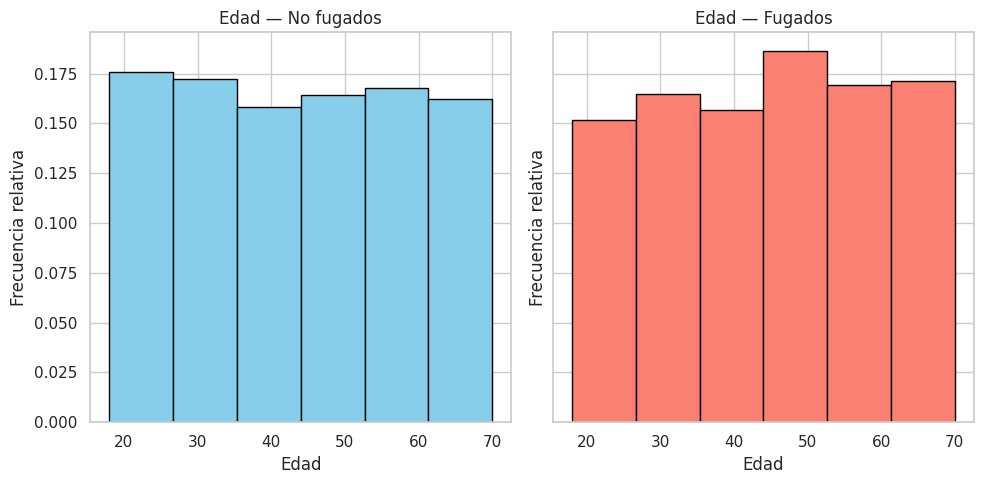

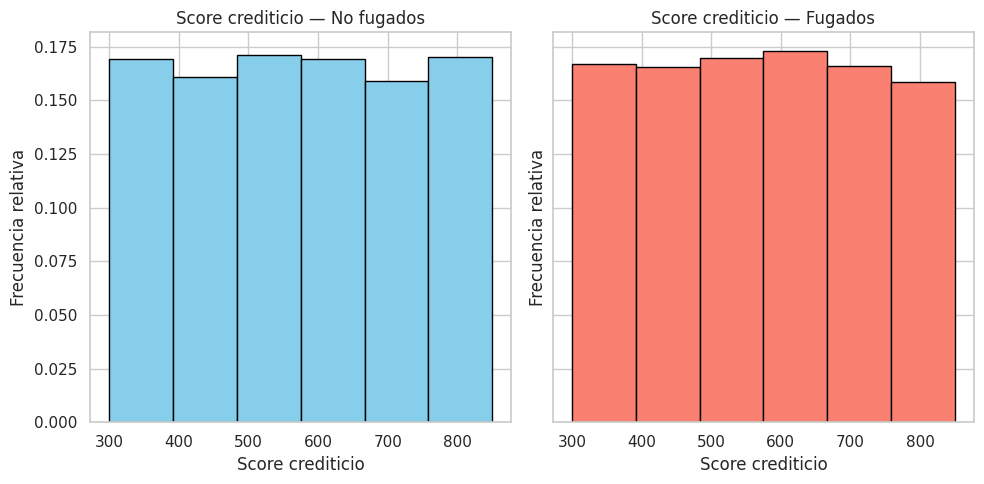

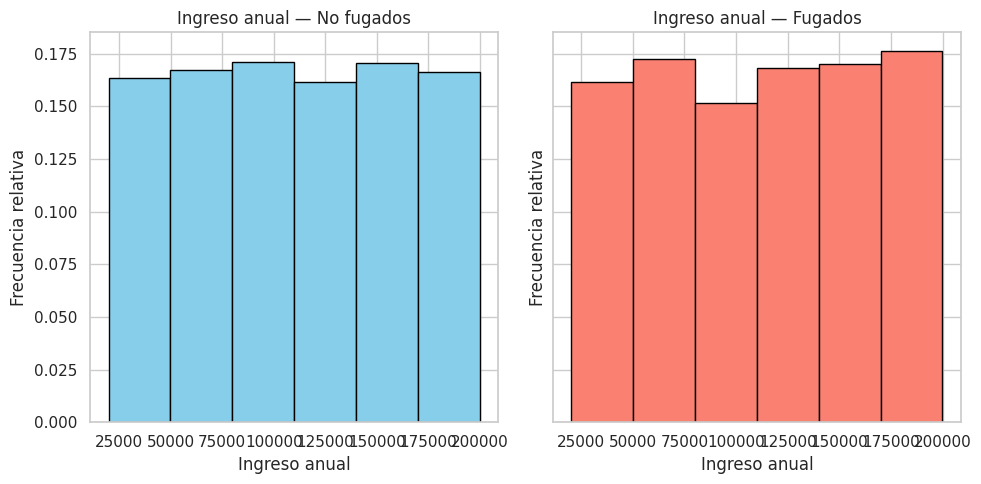

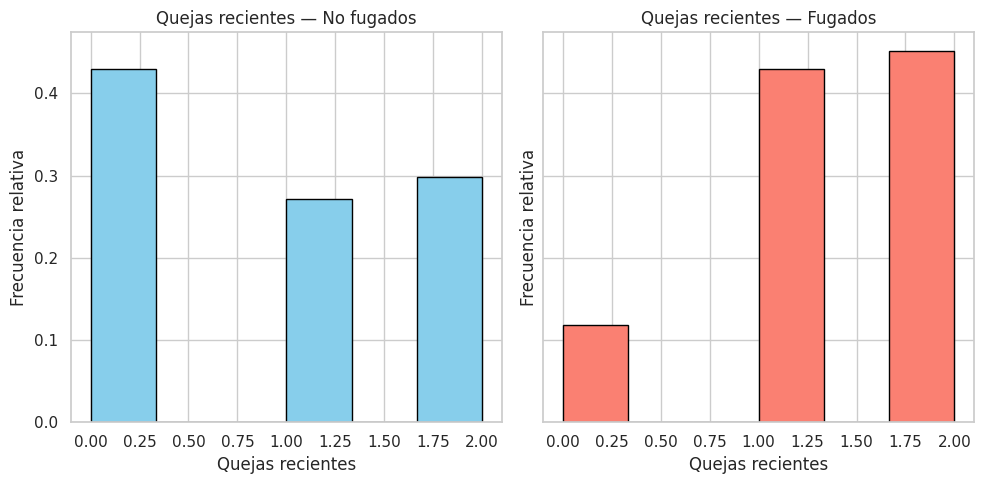

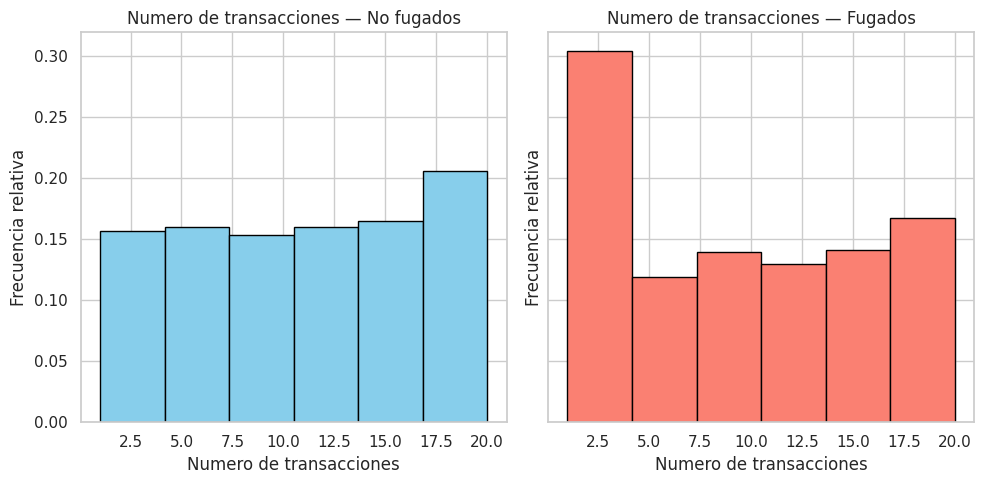

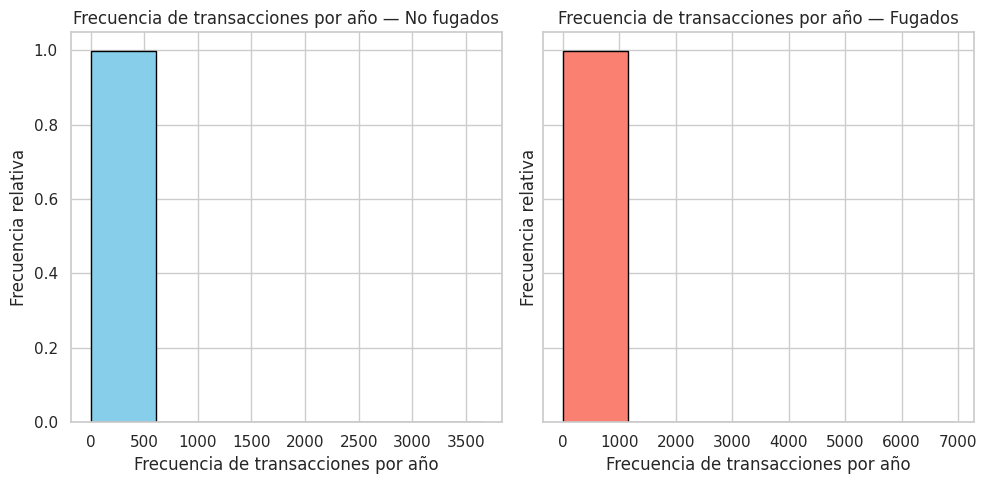

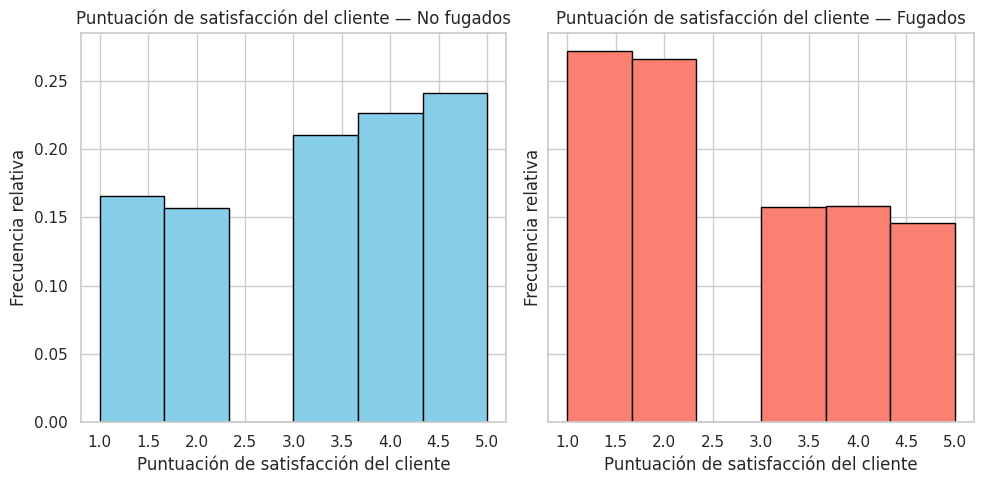

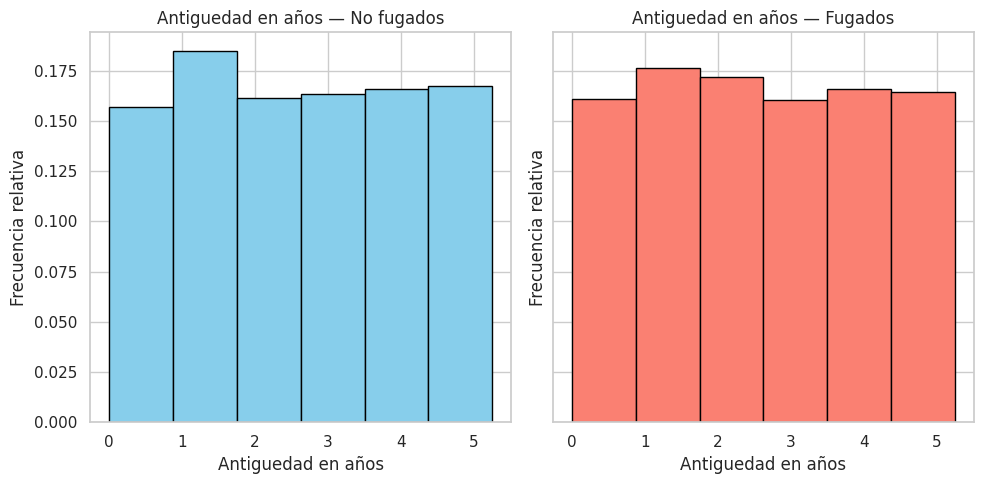

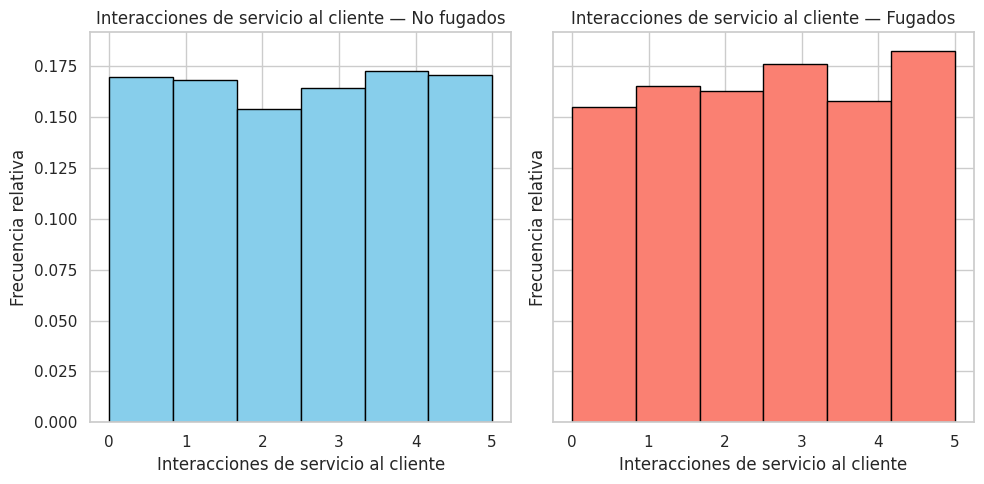

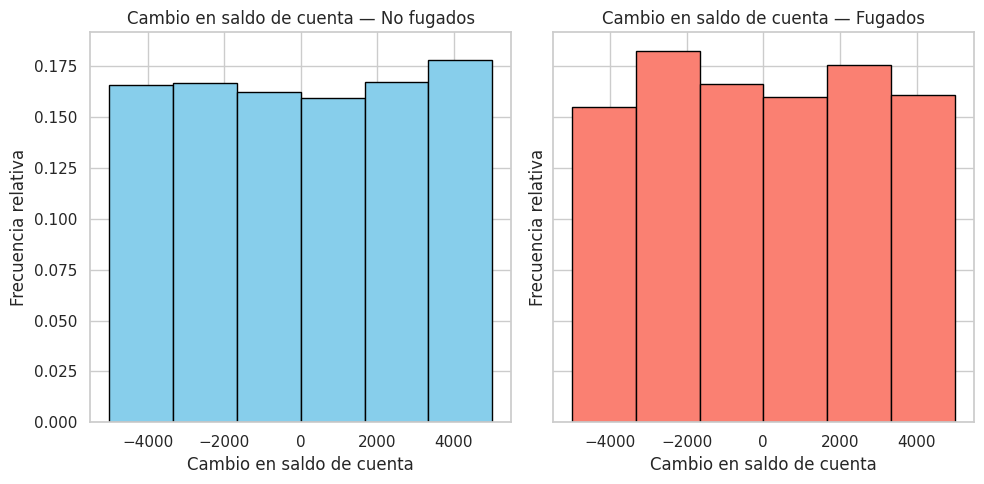

In [429]:
columnas=['Edad','Score crediticio','Ingreso anual','Quejas recientes','Numero de transacciones',
                       'Frecuencia de transacciones por año','Puntuación de satisfacción del cliente',
                       'Antiguedad en años','Interacciones de servicio al cliente','Cambio en saldo de cuenta']

for col in columnas:
    graficar_histograma_separado_por_fuga(df, col)

Al analizar las variables numericas, comparando los clientes activos con los fugados, se encuentra que:
--
* Respecto a la edad, existe cierta predisposición de las personas mayores a 50 años de edad a fugarse.
* La mayor cantidad de clientes fugados (80%), realizó más de una queja recientemente. Mientras que, en los clientes activos esta proporción es menor al 60%.
* Más del 70% de los clientes activos mantienen una puntuación de satisfacción del cliente mayor a 3 puntos, mientras que los fugados apenas supera el 40%.


**Se analiza la correlación para obtener mayor información**

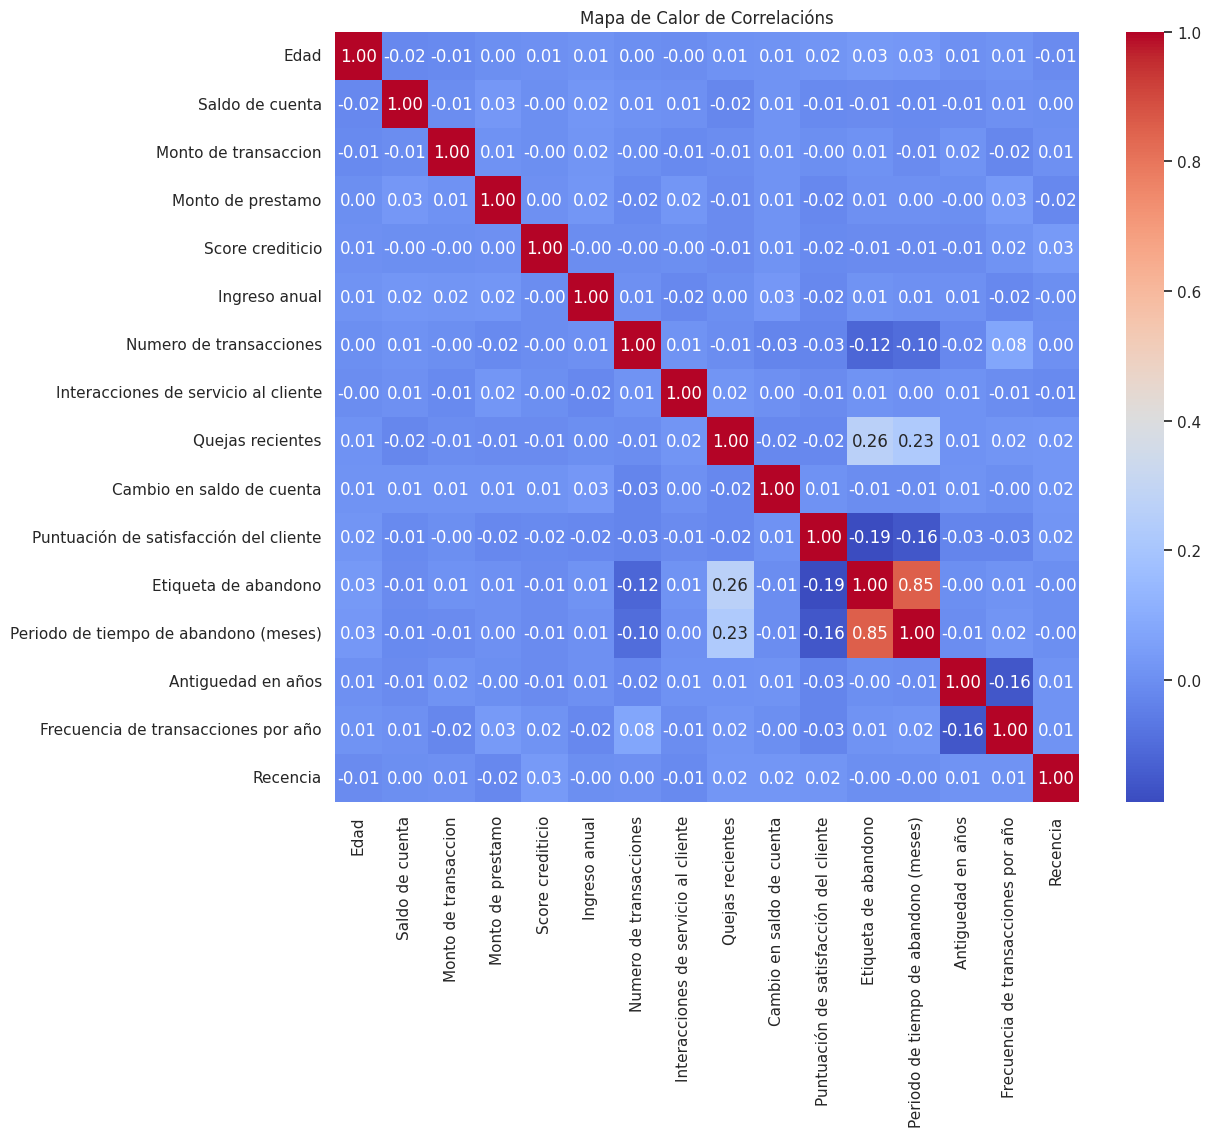

In [430]:
# Selecciona solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
correlacion = df_numerico.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlacións')
plt.show()

##**Conclusiones preliminares**

 * El gráfico de correlación refuerza la idea de que existen variables que afectan de forma directa o inversa la fuga de clientes.
 * Es destacable la relación positiva presente entre la variable quejas recientes y Etiqueta de abandono. Como se visualizó en gráficos anteriores, un aumento de quejas, podría potenciar la fuga de un cliente.
 * En un sentido inverso, la puntuación de satisfacción del cliente parece ser una variable que frena este fenómeno. Aquellos clientes que tienen una puntuación mayor de satisfacción, son más pasibles de permanecer activos en la cartera.
 * Otra variable que surge es el numero de transacciones durante el ultimo año. Al igual que la satisfacion del cliente, marca una relación negativa, por lo que podría inferirse que aquellos clientes con mayor numero de transacciones tienen menor probabilidad de fugarse.
 * El dataset presenta variables categoricas con distribuciones muy uniformes, por lo que se complejiza obtener conclusiones a partir de estas.
 * Si bien en esta parte del proyecto se descubrieron algunas caracteriticas que pueden posibilitar la identificación de potenciales fugas, aún falta produndizar el análisis para estar en condiciones de validar las hipotesis.